#**Linear Regression LAB Session**

###Creating a Dataset

In [23]:
import numpy as np


x = np.arange(1,25).reshape(12,2)
y = np.array([0,1,1,0,1,0,0,1,1,0,1,0])

In [24]:
x

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16],
       [17, 18],
       [19, 20],
       [21, 22],
       [23, 24]])

In [25]:
y

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

To get your data, you use arange(), which is very convenient for generating arrays based on numerical ranges. You also use .reshape() to modify the shape of the array returned by arange() and get a two-dimensional data structure.

#Practical Concepts For Model Building

###**Training Data Vs Validation Data Vs Testing Data**

***Training Data:***

Data that our algorithm learns from to produce results(model)

<br>

***Validation Data:***

Data that we use to test our results(model) in the process of building our model.

<br>

***Testing Data:***

Data that we use to test our final results(model) that our algorithm had produced. Our algorithm MUST not see any part of this data during the process. It should represent the real worl data that our model will interract with.

<br>

###**Splitting Our Dataset**

You can split your data by hand based on your intuition, domain knowledge or problem statement. We split our data using the ***train_test_split()*** present in sklearn's model_selection.


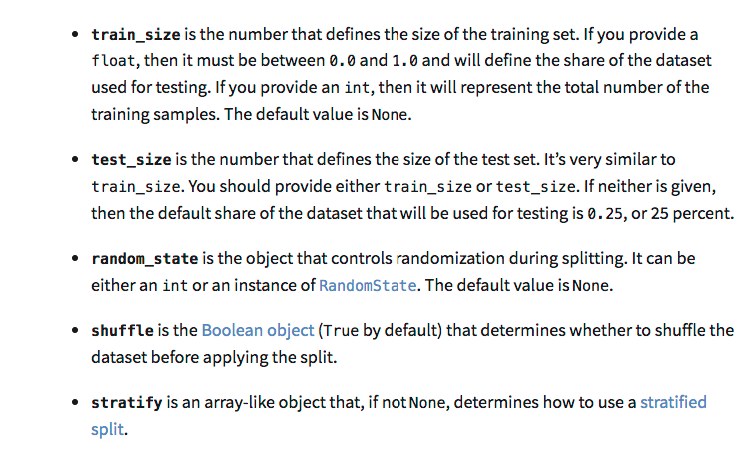


You can split both input and output datasets with a single function call:

In [26]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y)


In [27]:
x_train

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10],
       [23, 24],
       [17, 18],
       [15, 16],
       [ 3,  4],
       [11, 12],
       [19, 20]])

In [6]:
x_train

array([[19, 20],
       [15, 16],
       [ 5,  6],
       [ 1,  2],
       [21, 22],
       [23, 24],
       [11, 12],
       [17, 18],
       [ 3,  4]])

In [12]:
x_test

array([[ 9, 10],
       [19, 20],
       [23, 24]])

In [7]:
x_test

array([[ 7,  8],
       [ 9, 10],
       [13, 14]])

In [13]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 0, 1])

In [8]:
y_train

array([0, 1, 1, 0, 1, 0, 0, 1, 1])

In [9]:
y_test

array([0, 1, 0])

<br>

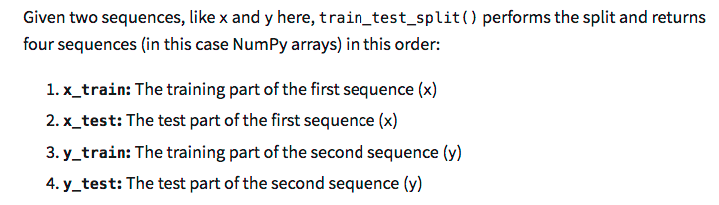

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1000)

In [19]:
x_train

array([[11, 12],
       [ 3,  4],
       [ 9, 10],
       [13, 14],
       [23, 24],
       [ 1,  2],
       [21, 22],
       [15, 16],
       [ 7,  8]])

In [15]:
x_train

array([[11, 12],
       [ 3,  4],
       [ 9, 10],
       [13, 14],
       [23, 24],
       [ 1,  2],
       [21, 22],
       [15, 16],
       [ 7,  8]])

In [16]:
x_test

array([[ 5,  6],
       [19, 20],
       [17, 18]])

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=1000)

In [34]:
x_train

array([[ 3,  4],
       [ 9, 10],
       [13, 14],
       [23, 24],
       [ 1,  2],
       [21, 22],
       [15, 16],
       [ 7,  8]])

In [35]:
x_test

array([[ 5,  6],
       [19, 20],
       [17, 18],
       [11, 12]])

In [36]:

y_train

array([1, 1, 0, 0, 0, 1, 1, 0])

In [37]:
y_test

array([1, 0, 1, 0])

You probably got different results from what you see here. This is because dataset splitting is random by default. The result differs each time you run the function. However, this often isn’t what you want.

Sometimes, to make your tests reproducible, you need a random split with the same output for each function call. You can do that with the parameter random_state. The value of random_state isn’t important—it can be any non-negative integer. You could use an instance of numpy.random.RandomState instead, but that is a more complex approach.

In the previous example, you used a dataset with twelve observations (rows) and got a training sample with nine rows and a test sample with three rows. That’s because you didn’t specify the desired size of the training and test sets. By default, 25 percent of samples are assigned to the test set. This ratio is generally fine for many applications, but it’s not always what you need.

Typically, you’ll want to define the size of the test (or training) set explicitly, and sometimes you’ll even want to experiment with different values. You can do that with the parameters train_size or test_size.

Modify the code so you can choose the size of the test set and get a reproducible result:

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=1000, stratify=y)

With this change, you get a different result from before. Earlier, you had a training set with nine items and test set with three items. Now, thanks to the argument test_size=4, the training set has eight items and the test set has four items. You’d get the same result with test_size=0.33 because 33 percent of twelve is approximately four.

There’s one more very important difference between the last two examples: You now get the same result each time you run the function. This is because you’ve fixed the random number generator with random_state=4.

The figure below shows what’s going on when you call train_test_split():

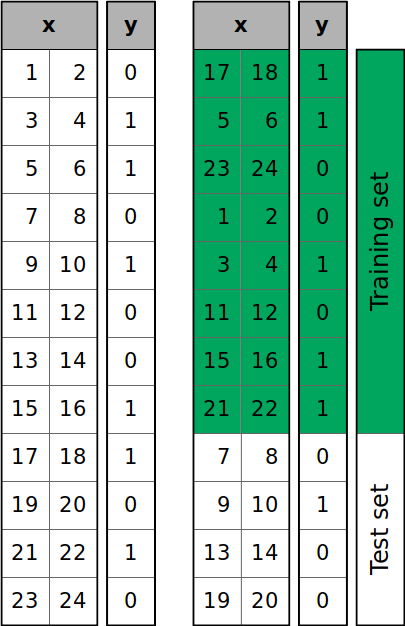

The samples of the dataset are shuffled randomly and then split into the training and test sets according to the size you defined.

You can see that y has six zeros and six ones. However, the test set has three zeros out of four items. If you want to (approximately) keep the proportion of y values through the training and test sets, then pass stratify=y. This will enable stratified splitting:

#**Supervised Machine Learning With train_test_split()**: Linear Regression
Now it’s time to see train_test_split() in action when solving supervised learning problems. You’ll start with a small regression problem that can be solved with linear regression before looking at a bigger problem.

In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [39]:
x = np.arange(20).reshape(-1, 1)
y = np.array([5, 12, 11, 19, 30, 29, 23, 40, 51, 54, 74,62, 68, 73, 89, 84, 89, 101, 99, 106])

In [40]:
x

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

In [41]:
y

array([  5,  12,  11,  19,  30,  29,  23,  40,  51,  54,  74,  62,  68,
        73,  89,  84,  89, 101,  99, 106])

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=8, random_state=0)

In [43]:
x_train

array([[ 4],
       [ 2],
       [ 5],
       [14],
       [ 9],
       [ 7],
       [16],
       [11],
       [ 3],
       [ 0],
       [15],
       [12]])

In [44]:
x_test

array([[18],
       [ 1],
       [19],
       [ 8],
       [10],
       [17],
       [ 6],
       [13]])

Your dataset has twenty observations, or x-y pairs. You specify the argument test_size=8, so the dataset is divided into a training set with twelve observations and a test set with eight observations.

Now you can use the training set to fit the model:

In [45]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [46]:
model.intercept_

3.1617195496417523

In [47]:
model.coef_

array([5.53121801])

In [ ]:
y = mx + c

y = 5.53x + 3.16

In [66]:
x_test

array([[18],
       [ 1],
       [19],
       [ 8],
       [10],
       [17],
       [ 6],
       [13]])

In [48]:
model.predict(x_test)

array([102.72364381,   8.69293756, 108.25486182,  47.41146366,
        58.47389969,  97.19242579,  36.34902764,  75.06755374])

LinearRegression creates the object that represents the model, while .fit() trains, or fits, the model and returns it. With linear regression, fitting the model means determining the best intercept (model.intercept_) and slope (model.coef_) values of the regression line.

Although you can use x_train and y_train to check the goodness of fit, this isn’t a best practice. An unbiased estimation of the predictive performance of your model is based on test data:

In [50]:
model.score(x_train,y_train)*100

98.68175024574795

In [53]:
model.score(x_test,y_test)*100

94.65896927715023

***.score()*** returns the coefficient of determination, or R², for the data passed. Its maximum is 1. The higher the R² value, the better the fit. In this case, the training data yields a slightly higher coefficient. However, the R² calculated with test data is an unbiased measure of your model’s prediction performance.

In [54]:
model_prediction=model.predict(x_test)

In [55]:
model_prediction

array([102.72364381,   8.69293756, 108.25486182,  47.41146366,
        58.47389969,  97.19242579,  36.34902764,  75.06755374])

In [57]:
import pandas as pd


x=pd.DataFrame(x, columns=['X'])
y=pd.DataFrame(y, columns=['Y'])

In [59]:
frames=[x,y]

df=pd.concat(frames,axis=1)

In [60]:
df

,X,Y
0,0,5
1,1,12
2,2,11
3,3,19
4,4,30
5,5,29
6,6,23
7,7,40
8,8,51
9,9,54


In [67]:
model_prediction=model.predict(x)
y_predictions=pd.DataFrame(model_prediction,columns=['y_pred'])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [72]:
y_frames=[df,y_predictions]

df=pd.concat(y_frames,axis=1)

In [73]:
# df=df.drop('y_pred',axis=1)

In [74]:
df

,X,Y,y_pred
0,0,5,3.161720
1,1,12,8.692938
2,2,11,14.224156
3,3,19,19.755374
4,4,30,25.286592
5,5,29,30.817810
6,6,23,36.349028
7,7,40,41.880246
8,8,51,47.411464
9,9,54,52.942682


In [75]:
from sklearn import metrics

MAE=metrics.mean_absolute_error(df.Y, df.y_pred)
print(MAE)

3.9822415557830126


In [77]:
RMSE=np.sqrt(MAE)
print(RMSE)

1.9955554504405566


In [ ]:
y = mx + c

y = 5.53x + 3.16

In [81]:
5.53*1 + 3.16

8.690000000000001

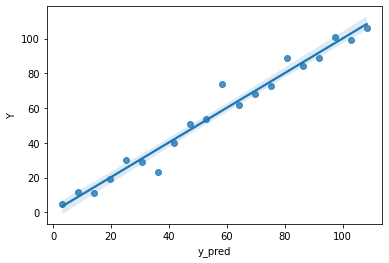

In [82]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='y_pred',y='Y',data=df)
plt.show()